In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [4]:
file_path = './nn2_data (1).csv'
trainingdata = np.genfromtxt(file_path, delimiter=',')

In [5]:
trainingdata.shape

(1000, 3)

In [6]:
#Store the number of rows in a variable
num_pts = trainingdata.shape[0]

In [8]:
x = trainingdata[:, 0:2] #input
d = trainingdata[:, 2:3] #desired output

In [9]:
d.shape


(1000, 1)

In [11]:
#Weights and bias between input and hidden layer
w1 = np.random.uniform(low=-1, high=1, size=(2,2))
b1 = np.random.uniform(low=-1, high=1, size=(2,1))

#Weight and bias between hidden and output layer
w2 = np.random.uniform(low=-1, high=1, size=(1,2))
b2 = np.random.uniform(low=-1, high=1, size=(1,1))

In [12]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [13]:
def ff(inp):
    
    #Hidden Layer computations
    z1 = np.matmul(w1, inp) + b1
    y1 = sigmoid(z1)
    
    #Output Layer Computations
    z2 = np.matmul(w2, y1) + b2
    o = sigmoid(z2)
    
    return o, y1

In [17]:
def bp(eta, d, o, y1, inp):
    
    #Define matrix of zeros for 2nd layer weights and bias
    delta_w2 = np.zeros_like(w2)
    delta_b2 = np.zeros_like(b2)
    
    #Loops
    for i in range(1):
        delta_b2[i, 0] = eta * (o-d)*o*(1-o)
        for j in range(2):
            delta_w2[i, j ] = eta*(o-d)*o*(1-o)*y1[j,i]
            
    #Define matrix of zeros for 1st layer weights and bias
    delta_w1 = np.zeros_like(w1)
    delta_b1 = np.zeros_like(b1)
    
    for i in range(2):
        delta_b1[i,0] = eta*(o-d)*o*(1-o)*w2[0,i]*y1[i,0]*(1-y1[i,0])
        for j in range(2):
            delta_w1[i,j] = eta*(o-d)*o*(1-o)*w2[0,i]*y1[i,0]*(1-y1[i,0])*inp[j,0]
    return delta_w1,delta_b1, delta_w2, delta_b2

In [18]:
#Define training parameters
num_epochs = 300
eta = 0.1

In [19]:
#Define a vector to store the output values
o = np.zeros_like(d)

Epoch: 0 Error: 0.15150685752164922
Epoch: 50 Error: 0.15034243481935278
Epoch: 100 Error: 0.14927869013288436
Epoch: 150 Error: 0.1483023344380855
Epoch: 200 Error: 0.14740202935054936
Epoch: 250 Error: 0.14656809474893817
Epoch: 300 Error: 0.145792245922571


Text(0.5, 1.0, 'Error vs num epochs - Online Training')

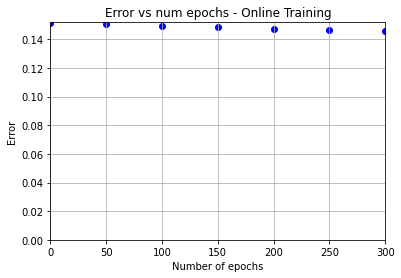

In [28]:
#Loop through the epochs
for epochs in range(num_epochs+1):
    
    for i in range(num_pts):
        
        #Generate an input vector of 2x1 dimension
        inp = np.array([[x[i,0]], [x[i,1]]])
        
        #Function call for feed forward operation
        o[i,0], y1 = ff(inp)
        
        #Function call for back propagation
        delta_w1, delta_b1,delta_w2, delta_b2 = bp(eta, d[i,0], o[i, 0], y1, inp)
        
        #Update weights and bias
        w1 -= delta_w1
        b1 -= delta_b1
        
        w2 -= delta_w2
        b2 -= delta_b2
        
    #compute the error
    e = 0.5*np.sum((o-d)**2)
    
    #Display error every 50 epochs
    if epochs%50 == 0:
        
        print('Epoch: {}'.format(epochs) + ' Error: {}'.format(e))
        
        #Plotting error
        plt.scatter(epochs, e, c='b')

#Plot formatting
plt.grid()
plt.xlim(0, num_epochs)
plt.ylim(0,)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Error vs num epochs - Online Training')

### Testing the weights

In [30]:
inp = np.array([[0.33], [0.44]])

o, _ = ff(inp)

print('network output: {}'.format(o[0,0]))
print('desired output: {}'.format(np.sin(0.33+0.44)))

network output: 0.7073632102994473
desired output: 0.6961352386273567


### Reinitialization of the weights

In [32]:
#Weights and bias between input and hidden layer
w1 = np.random.uniform(low=-1, high=1, size=(2,2))
b1 = np.random.uniform(low=-1, high=1, size=(2,1))

#Weights and bias between input and hidden layer
w2 = np.random.uniform(low=-1, high=1, size=(1,2))
b2 = np.random.uniform(low=-1, high=1, size=(1,1))

### Batch Training

In [33]:
num_epochs = 500
eta = 0.1

In [34]:
#Define a vector to store output values
o = np.zeros_like(d)

Epoch: 0 Error: 0.1620162124447347
Epoch: 50 Error: 0.15665026348705763
Epoch: 100 Error: 0.15134422543946316
Epoch: 150 Error: 0.14608842259485177
Epoch: 200 Error: 0.1408599947200097
Epoch: 250 Error: 0.13563217001140843
Epoch: 300 Error: 0.13037840337181822
Epoch: 350 Error: 0.12508161301532655
Epoch: 400 Error: 0.11974018990989839
Epoch: 450 Error: 0.11436815502164255


Text(0.5, 1.0, 'Error vs num epochs - Online Training')

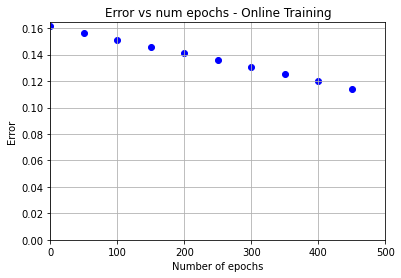

In [39]:
#Defining variables that hold the sum of the gradients as they are computed
delta_w1_batch = np.zeros_like(w1)
delta_b1_batch = np.zeros_like(b1)

delta_w2_batch = np.zeros_like(w2)
delta_b2_batch = np.zeros_like(b2)

for epochs in range(num_epochs):
    
    for i in range(num_pts):
        
        #Generate an input vector of 2x1 dimension
        inp = np.array([[x[i,0]], [x[i,1]]])
        
        #Function call to feed forward
        o[i,0], y1 = ff(inp)
        
        #Function call for backpropagation
        delta_w1, delta_b1, delta_w2, delta_b2 = bp(eta, d[i,0], o[i,0], y1, inp)
        
        #Summing up the gradients
        delta_w1_batch += delta_w1
        delta_b1_batch += delta_b1
        
        delta_w2_batch += delta_w2
        delta_b2_batch += delta_b2
        
        #Update weights after 100 training data points
        if i%100 == 0:
            
            w1 -= delta_w1_batch
            b1 -= delta_b1_batch
            
            w2 -= delta_w2_batch
            b2 -= delta_b2_batch
            
            #Reset the delta collection matrices
            delta_w1_batch = np.zeros_like(w1)
            delta_b1_batch = np.zeros_like(b1)
            delta_w2_batch = np.zeros_like(w2)
            delta_b2_batch = np.zeros_like(b2)
            
     #compute the error
    e = 0.5*np.sum((o-d)**2)
    
    #Display error every 50 epochs
    if epochs%50 == 0:
        
        print('Epoch: {}'.format(epochs) + ' Error: {}'.format(e))
        
        #Plotting error
        plt.scatter(epochs, e, c='b')

#Plot formatting
plt.grid()
plt.xlim(0, num_epochs)
plt.ylim(0,)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Error vs num epochs - Online Training')

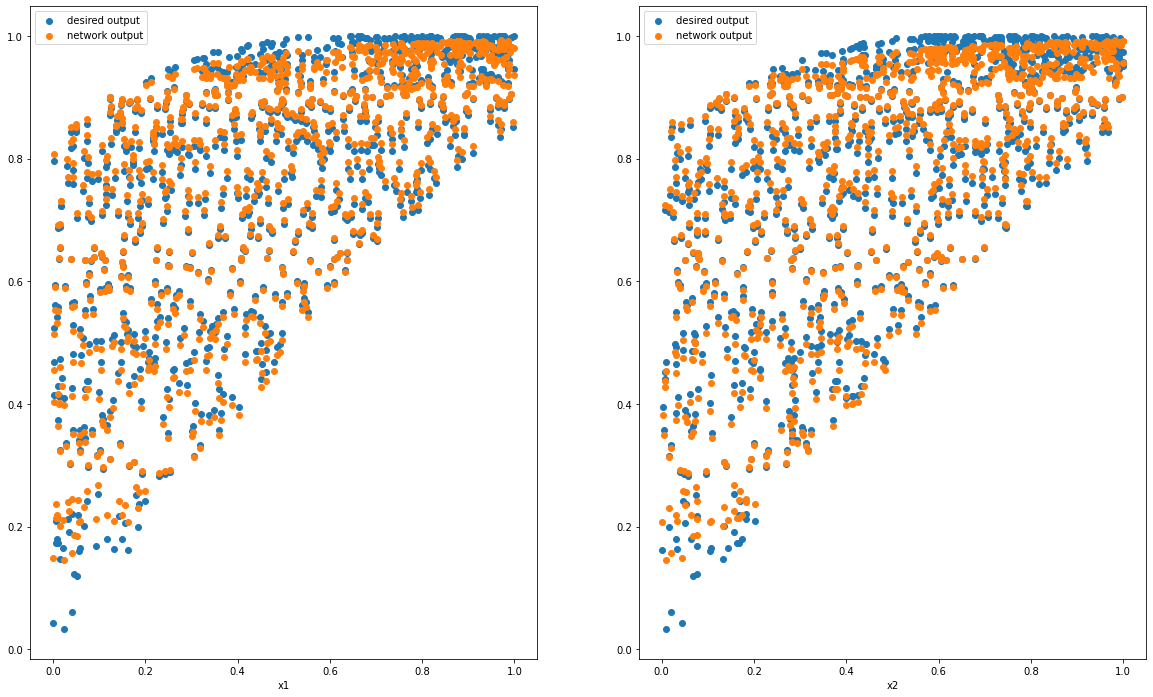

In [45]:
#Compute the forward dpass for plotting
o = np.zeros_like(d)

#Loop through the training data
for i in range(num_pts):
    inp = np.array(([x[i,0]], [x[i,1]]))
    o[i, 0], _ = ff(inp)
    
#Plot the network prodiction
fig, ax = plt.subplots(nrows = 1, ncols= 2, figsize=(20,12))

#subplot of x1 vs output
ax[0].scatter(x[:,0], d, label='desired output')
ax[0].scatter(x[:,0], o, label='network output')
ax[0].set_xlabel('x1')
ax[0].legend()

#Subplot of x2 vs output
ax[1].scatter(x[:,1], d, label='desired output')
ax[1].scatter(x[:,1], o, label='network output')
ax[1].set_xlabel('x2')
ax[1].legend()
